## Problem statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

There are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, we need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed me to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires me to build a model wherein I'll need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Data
You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

## Step 1: Importing the data

In [1]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import k_means
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Read the dataset

# Save it into a dataframe called "leads"
leads = pd.read_csv("C:/Users/Arbaaz/Downloads/IIIT-Data Science program/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv")

In [4]:
# Looking at the first few entries
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Inspect the shape of the dataset

leads.shape

(9240, 37)

In [6]:
# Inspect the different columsn in the dataset

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [7]:
# Check the summary of the dataset

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# Check the info to see the types of the feature variables and the null values present

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## observations
- A large number of columns have null values.
- Prospect ID and Lead Number both are unique identifiers and sarves the same purpose so we drop Prospect ID column.
- Few categories have the select in their entries. Those select are essentially null values beacause it appers when lead does not select anything from dropdown so we will treat them as well

## Step 2: Data Cleaning and Preparation

#### Renaming the columns name
- Long column name will effect the chart

In [9]:
leads.columns = leads.columns.str.replace(' ','_').str.lower()
leads.columns

Index(['prospect_id', 'lead_number', 'lead_origin', 'lead_source',
       'do_not_email', 'do_not_call', 'converted', 'totalvisits',
       'total_time_spent_on_website', 'page_views_per_visit', 'last_activity',
       'country', 'specialization', 'how_did_you_hear_about_x_education',
       'what_is_your_current_occupation',
       'what_matters_most_to_you_in_choosing_a_course', 'search', 'magazine',
       'newspaper_article', 'x_education_forums', 'newspaper',
       'digital_advertisement', 'through_recommendations',
       'receive_more_updates_about_our_courses', 'tags', 'lead_quality',
       'update_me_on_supply_chain_content', 'get_updates_on_dm_content',
       'lead_profile', 'city', 'asymmetrique_activity_index',
       'asymmetrique_profile_index', 'asymmetrique_activity_score',
       'asymmetrique_profile_score',
       'i_agree_to_pay_the_amount_through_cheque',
       'a_free_copy_of_mastering_the_interview', 'last_notable_activity'],
      dtype='object')

In [10]:
# shorten column names
leads.rename(columns = {'totalvisits': 'total_visits', 'total_time_spent_on_website': 'time_on_website', 
                    'how_did_you_hear_about_x_education': 'source', 'what_is_your_current_occupation': 'occupation',
                    'what_matters_most_to_you_in_choosing_a_course' : 'course_selection_reason', 
                    'receive_more_updates_about_our_courses': 'want_courses_updates', 
                     'update_me_on_supply_chain_content': 'supply_chain_content_updates',
                    'get_updates_on_dm_content': 'dm_content_updates',
                    'i_agree_to_pay_the_amount_through_cheque': 'cheque_payment',
                    'a_free_copy_of_mastering_the_interview': 'mastering_interview'}, inplace = True)

leads.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,do_not_call,converted,total_visits,time_on_website,page_views_per_visit,...,dm_content_updates,lead_profile,city,asymmetrique_activity_index,asymmetrique_profile_index,asymmetrique_activity_score,asymmetrique_profile_score,cheque_payment,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [11]:
# Checking the number of missing values in each column

round((leads.isnull().sum().sort_values(ascending=False)/len(leads)),2)*100

lead_quality                    52.0
asymmetrique_activity_index     46.0
asymmetrique_profile_score      46.0
asymmetrique_activity_score     46.0
asymmetrique_profile_index      46.0
tags                            36.0
lead_profile                    29.0
course_selection_reason         29.0
occupation                      29.0
country                         27.0
source                          24.0
specialization                  16.0
city                            15.0
page_views_per_visit             1.0
total_visits                     1.0
last_activity                    1.0
lead_source                      0.0
want_courses_updates             0.0
cheque_payment                   0.0
dm_content_updates               0.0
supply_chain_content_updates     0.0
mastering_interview              0.0
prospect_id                      0.0
newspaper_article                0.0
through_recommendations          0.0
digital_advertisement            0.0
newspaper                        0.0
x

### Replacing "Select"  category with null values

In [12]:
# Select all non-numeric columns because select is a drop down
leads_obj = leads.select_dtypes(include='object')

# Find out colums that have "Select"
s = lambda x : x.str.contains('Select', na=False)
l = leads_obj.columns[leads_obj.apply(s).any()].tolist()
print(l)

['specialization', 'source', 'lead_profile', 'city']


 There are 4 columns that contain Select, we are going to make that change

In [13]:
# all columns which has select in it
sel_cols = ['specialization', 'source', 'lead_profile', 'city']

# replace value with nan
leads[sel_cols] = leads[sel_cols].replace('Select', np.NAN)

## Handeling null values

In [14]:
# checking null values
leads.isnull().sum()

prospect_id                        0
lead_number                        0
lead_origin                        0
lead_source                       36
do_not_email                       0
do_not_call                        0
converted                          0
total_visits                     137
time_on_website                    0
page_views_per_visit             137
last_activity                    103
country                         2461
specialization                  3380
source                          7250
occupation                      2690
course_selection_reason         2709
search                             0
magazine                           0
newspaper_article                  0
x_education_forums                 0
newspaper                          0
digital_advertisement              0
through_recommendations            0
want_courses_updates               0
tags                            3353
lead_quality                    4767
supply_chain_content_updates       0
d

In [15]:
# Check the number of null values again

round(100*(leads.isnull().sum().sort_values(ascending=False)/len(leads)),2)

source                          78.46
lead_profile                    74.19
lead_quality                    51.59
asymmetrique_profile_score      45.65
asymmetrique_activity_score     45.65
asymmetrique_activity_index     45.65
asymmetrique_profile_index      45.65
city                            39.71
specialization                  36.58
tags                            36.29
course_selection_reason         29.32
occupation                      29.11
country                         26.63
page_views_per_visit             1.48
total_visits                     1.48
last_activity                    1.11
lead_source                      0.39
want_courses_updates             0.00
cheque_payment                   0.00
dm_content_updates               0.00
supply_chain_content_updates     0.00
mastering_interview              0.00
prospect_id                      0.00
newspaper_article                0.00
through_recommendations          0.00
digital_advertisement            0.00
newspaper   

In [16]:
# dropping the columns with more than 30% nun values

leads.drop(columns=['source','lead_profile','lead_quality','asymmetrique_profile_score','asymmetrique_activity_score',
                            'asymmetrique_profile_index','asymmetrique_activity_index','tags'], axis =1 , inplace=True)

In [17]:
# Get the value counts of all the columns

for col in leads.columns:
    print(leads[col].value_counts())
    print("___________________________________________________")

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: prospect_id, Length: 9240, dtype: int64
___________________________________________________
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: lead_number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: lead_origin, dtype: int64
__________________

We can see that in value counts of all the columns, there are a few columns in which only has one unique values and they are highly skewed columns was majorly present for all the data points. These include do_not_call, course_selection_reason, search, magazine, newspaper_article, x_education_forums, newspaper, digital_advertisement, through_recommendations, want_courses_updates, supply_chain_content_updates, dm_content_updates, cheque_payment.

So we can drop all these columns as they won't be required for the analysis of the dataset.

In [18]:
leads.drop(['do_not_call', 'course_selection_reason', 'search', 
            'magazine', 'newspaper_article', 'x_education_forums', 'newspaper', 'digital_advertisement', 'through_recommendations', 
            'want_courses_updates', 'supply_chain_content_updates', 'dm_content_updates', 'cheque_payment'], 
           axis=1, inplace=True)

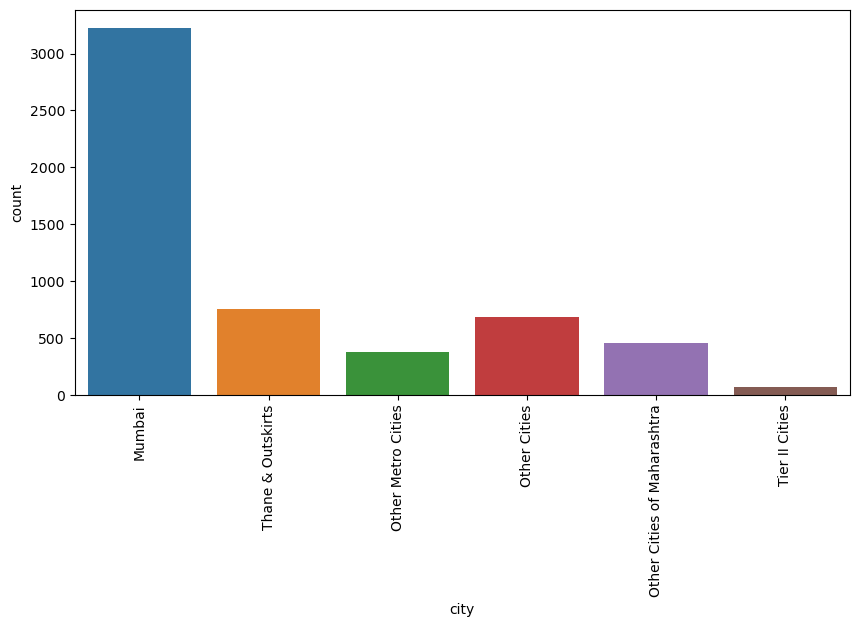

In [19]:
# Analysing Column City

plt.figure(figsize=(10,5))
sns.countplot(x = 'city', data = leads)
plt.xticks(rotation = 90)
plt.show()

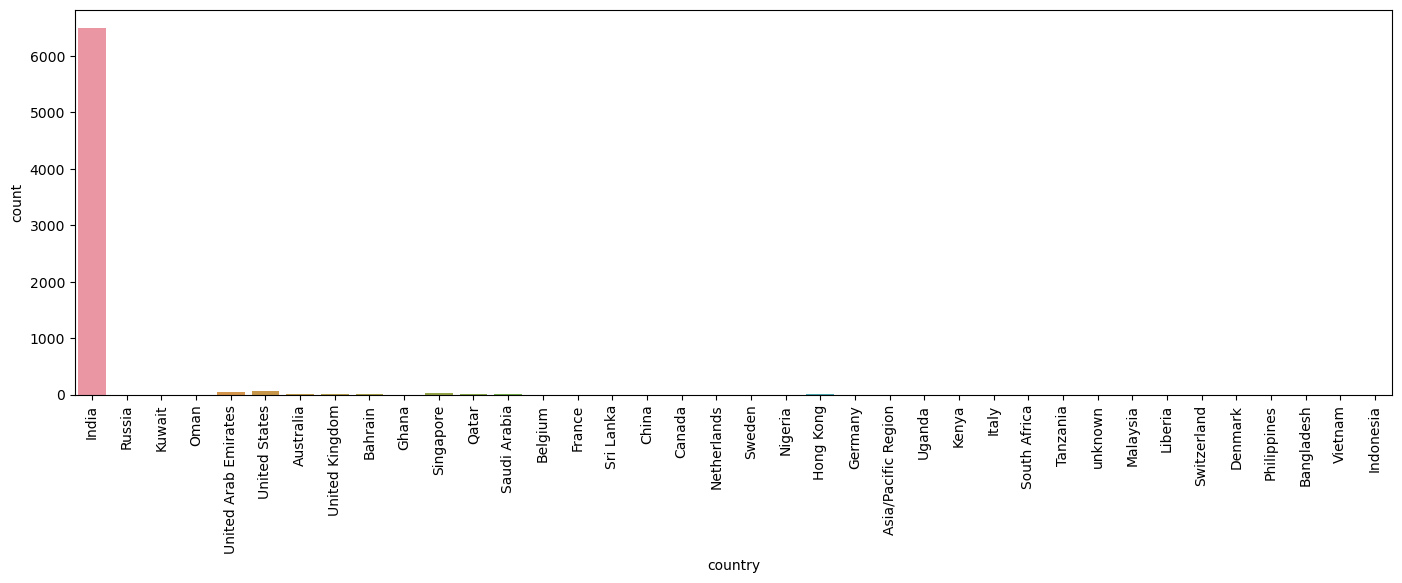

In [20]:
plt.figure(figsize=(17,5))
sns.countplot(x='country', data=leads)
plt.xticks(rotation =90)
plt.show()

As we can see that for above observations for columns "City" and "Country" there are some missing values so we can impute the columns or else we drop them.
- As I am dropping the columns because they won't be required for the analysis.

In [21]:
# droping City & Country cloumns
leads.drop(['city','country'], axis=1, inplace=True)

In [22]:
# Checking again for the null values

round(100*(leads.isnull().sum().sort_values(ascending=False)/len(leads)),2)

specialization           36.58
occupation               29.11
total_visits              1.48
page_views_per_visit      1.48
last_activity             1.11
lead_source               0.39
prospect_id               0.00
lead_number               0.00
lead_origin               0.00
do_not_email              0.00
converted                 0.00
time_on_website           0.00
mastering_interview       0.00
last_notable_activity     0.00
dtype: float64

Checking the value counts for single columns which are having null or select values.

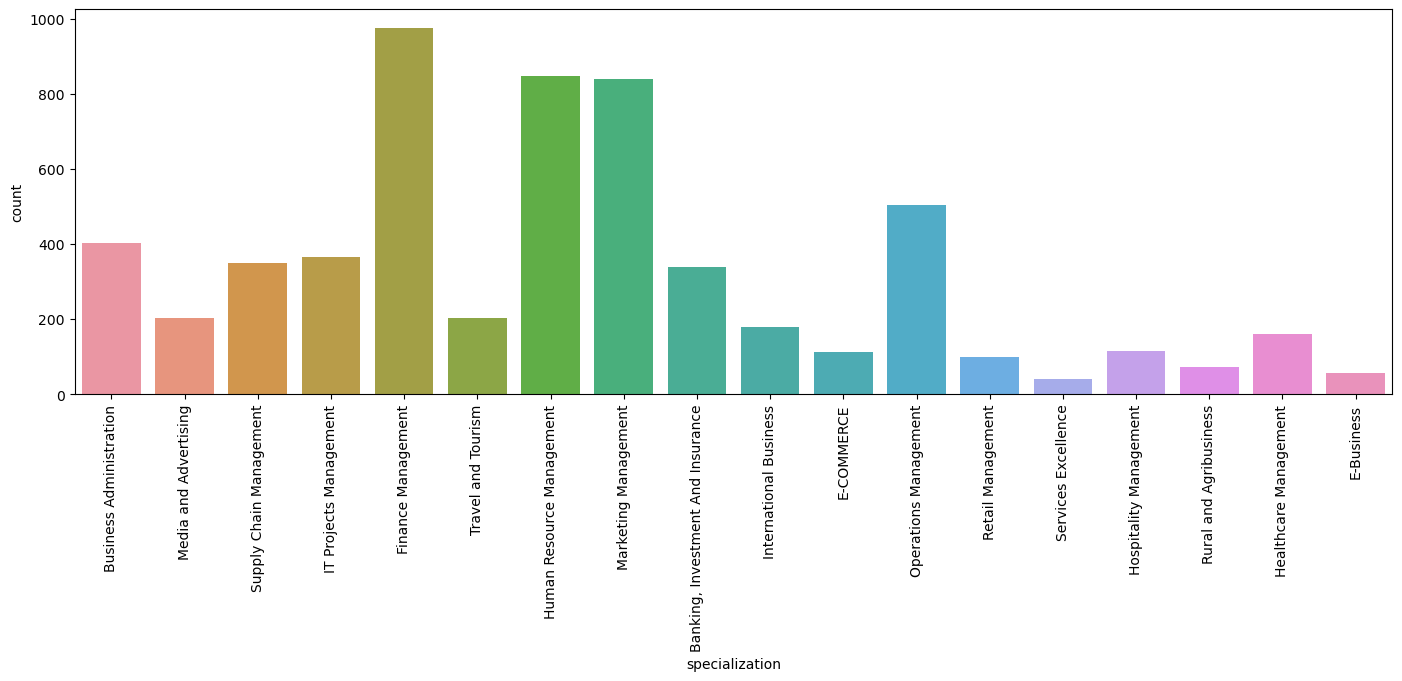

In [23]:
# Analyzing specialization column

plt.figure(figsize=(17,5))
sns.countplot(x = 'specialization',data = leads)
plt.xticks(rotation = 90)
plt.show()

We can see that we have more "Select" or "NaN" values which menas they are missing values so we can impute this columns as it has less than 36% missing values.

In [24]:
# appling value_counts() on specialization col

leads['specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: specialization, dtype: int64

In [25]:
#Creating a seprate category called 'others' for missing values
leads['specialization'] = leads['specialization'].replace(np.nan,'others')

In [26]:
# Checking again for the null values

round(100*(leads.isnull().sum().sort_values(ascending=False)/len(leads)),2)

occupation               29.11
total_visits              1.48
page_views_per_visit      1.48
last_activity             1.11
lead_source               0.39
prospect_id               0.00
lead_number               0.00
lead_origin               0.00
do_not_email              0.00
converted                 0.00
time_on_website           0.00
specialization            0.00
mastering_interview       0.00
last_notable_activity     0.00
dtype: float64

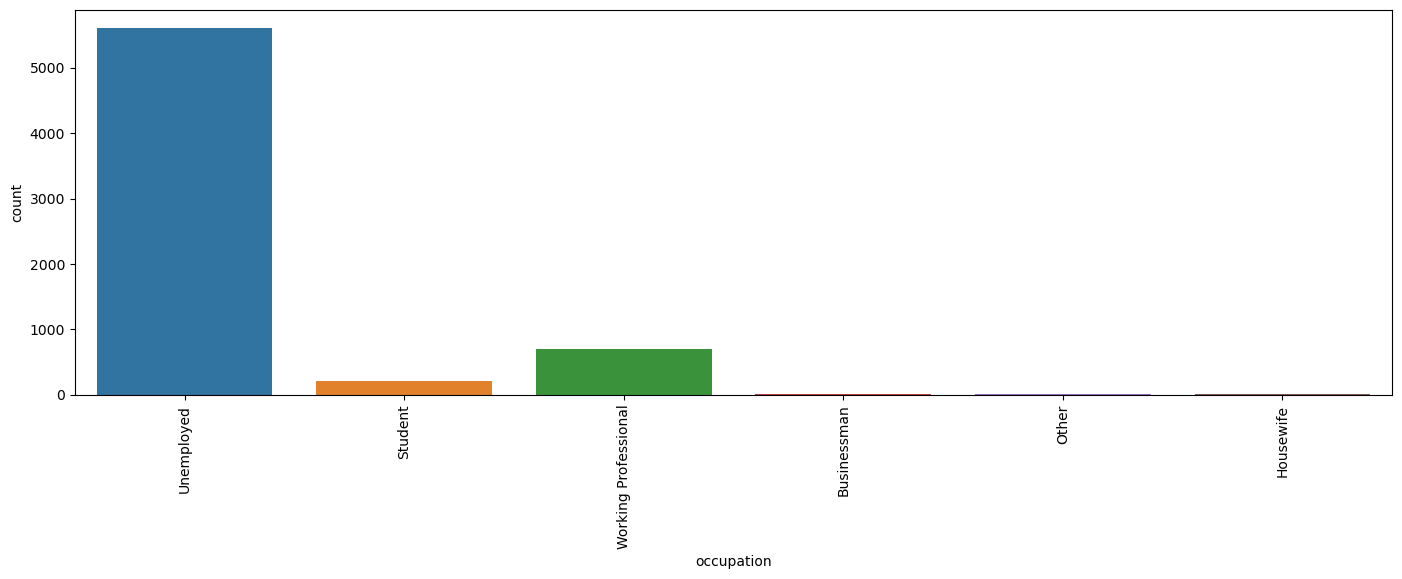

In [27]:
# Analyzing specialization column

plt.figure(figsize=(17,5))
sns.countplot(x = 'occupation',data = leads)
plt.xticks(rotation = 90)
plt.show()

This col have 29% missing values

In [28]:
# Finding the percentage of the diffrent categories of this column:
round(leads['occupation'].value_counts(normalize=True),2)*100

Unemployed              85.0
Working Professional    11.0
Student                  3.0
Other                    0.0
Housewife                0.0
Businessman              0.0
Name: occupation, dtype: float64

since the most values are 'Unemployed', we can impute missing values in this column with this value.

In [29]:
#Imputing the missing values
leads['occupation']= leads['occupation'].replace(np.nan,'Unemployed')

In [30]:
# Checking again for the null values

round(100*(leads.isnull().sum().sort_values(ascending=False)/len(leads)),2)

total_visits             1.48
page_views_per_visit     1.48
last_activity            1.11
lead_source              0.39
prospect_id              0.00
lead_number              0.00
lead_origin              0.00
do_not_email             0.00
converted                0.00
time_on_website          0.00
specialization           0.00
occupation               0.00
mastering_interview      0.00
last_notable_activity    0.00
dtype: float64

#### Rest missing values are under 1% so we can drop these rows.

In [31]:
#Droping the rows with null values
leads.dropna(inplace=True)

In [32]:
# Checking again for the null values

round(100*(leads.isnull().sum().sort_values(ascending=False)/len(leads)),2)

prospect_id              0.0
lead_number              0.0
lead_origin              0.0
lead_source              0.0
do_not_email             0.0
converted                0.0
total_visits             0.0
time_on_website          0.0
page_views_per_visit     0.0
last_activity            0.0
specialization           0.0
occupation               0.0
mastering_interview      0.0
last_notable_activity    0.0
dtype: float64

Now we can see that there no missing values so we can continue with our analysis.

In [33]:
# Let's look at the dataset again

leads.head()

,prospect_id,lead_number,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,specialization,occupation,mastering_interview,last_notable_activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,others,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,No,Modified


In [34]:
# Drop columns Prospect ID and Lead Number

leads.drop(['prospect_id','lead_number'], 1, inplace=True)

In [35]:
leads.head()

,lead_origin,lead_source,do_not_email,converted,total_visits,time_on_website,page_views_per_visit,last_activity,specialization,occupation,mastering_interview,last_notable_activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,others,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,others,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,others,Unemployed,No,Modified


In [36]:
num_cols=["total_visits","time_on_website","page_views_per_visit"]
cat_cols=["lead_origin","lead_source","do_not_email","last_activity","specialization","occupation","mastering_interview",
         "last_notable_activity"]

# Exploratory Data Analysis

### Univaraite Analysis

In [37]:
converted = (sum(leads['converted'])/len(leads['converted'].index))*100
converted

37.85541106458012

The lead conversion rate is 48%.

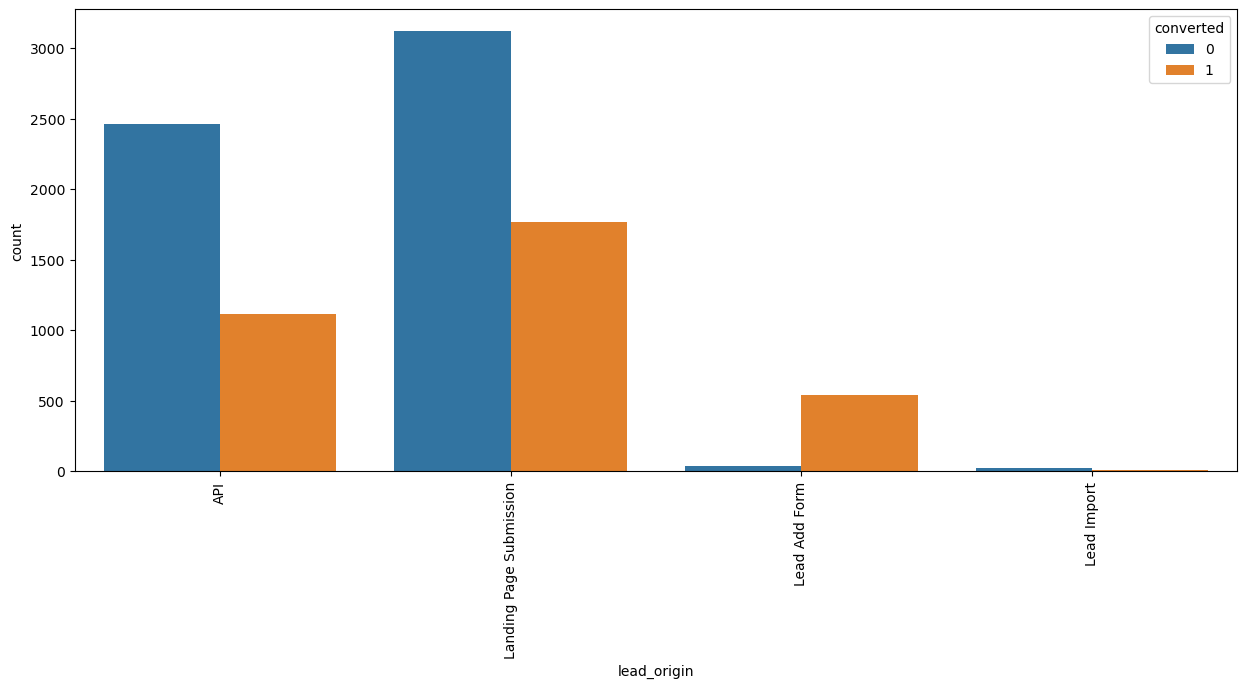

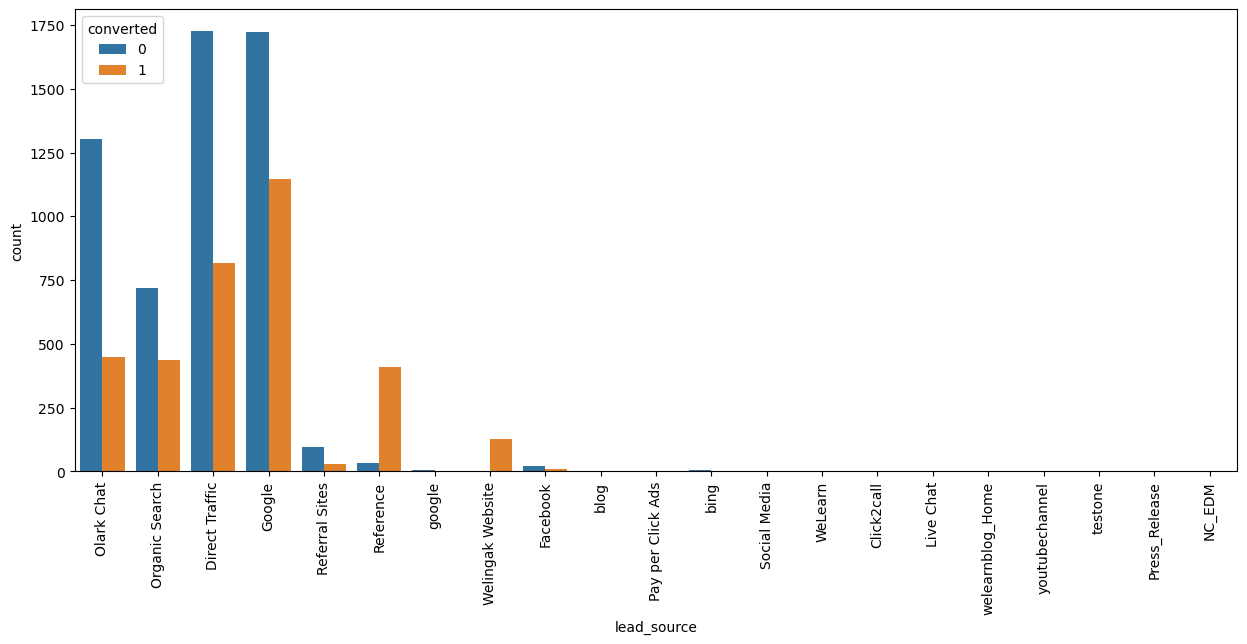

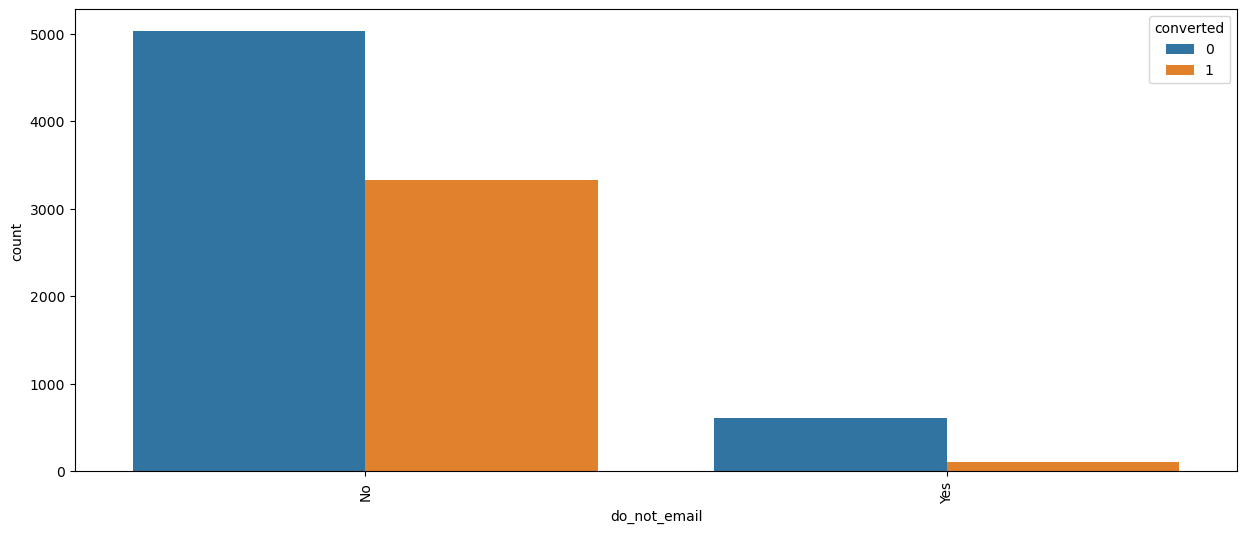

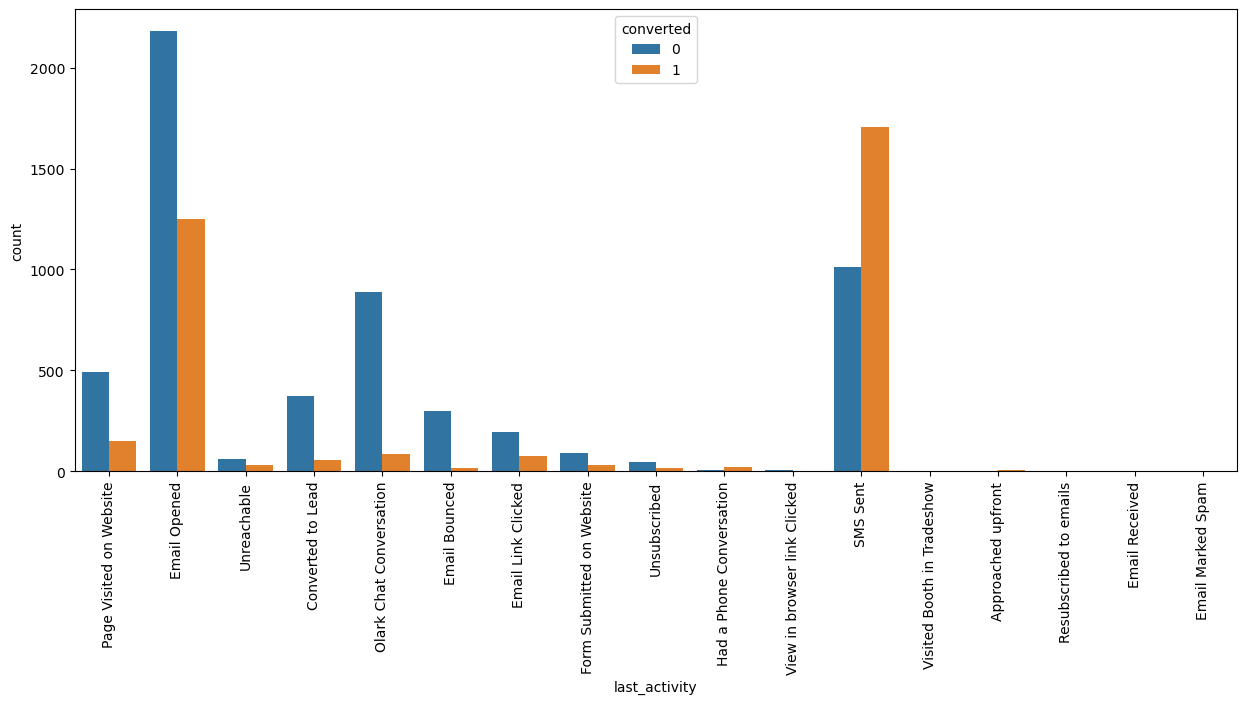

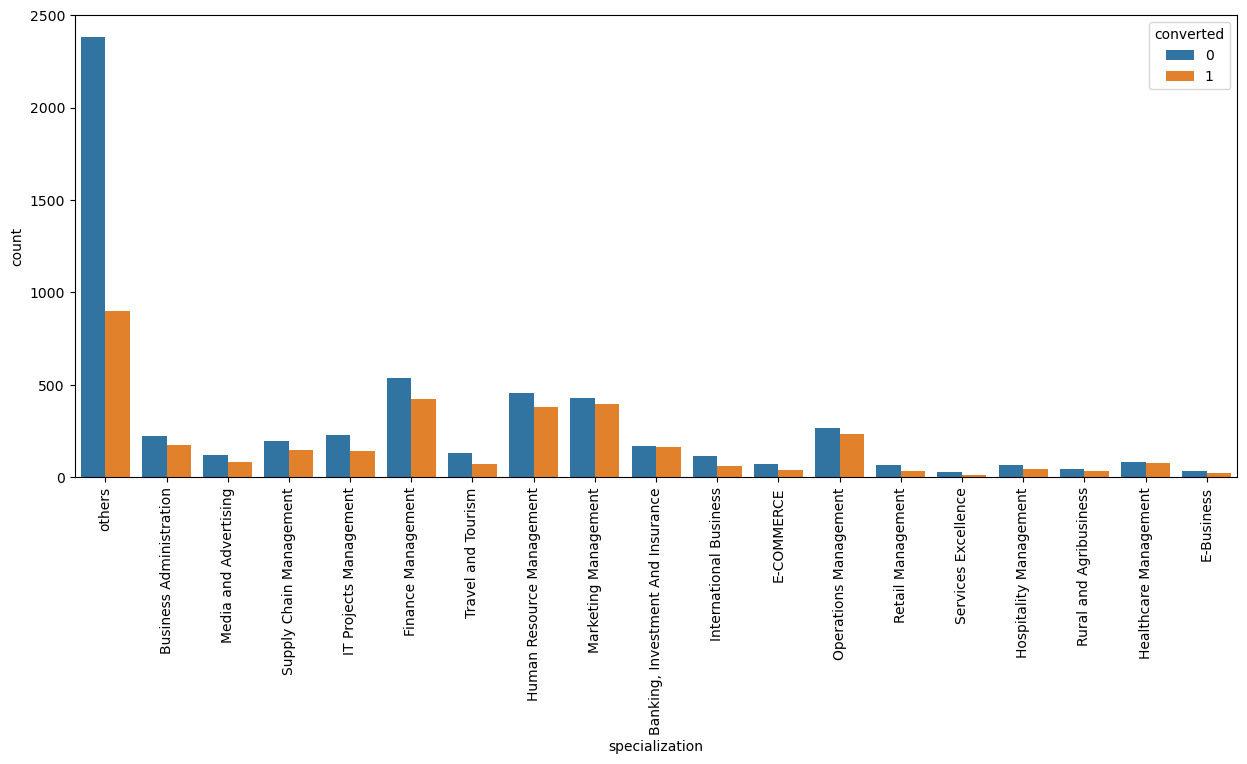

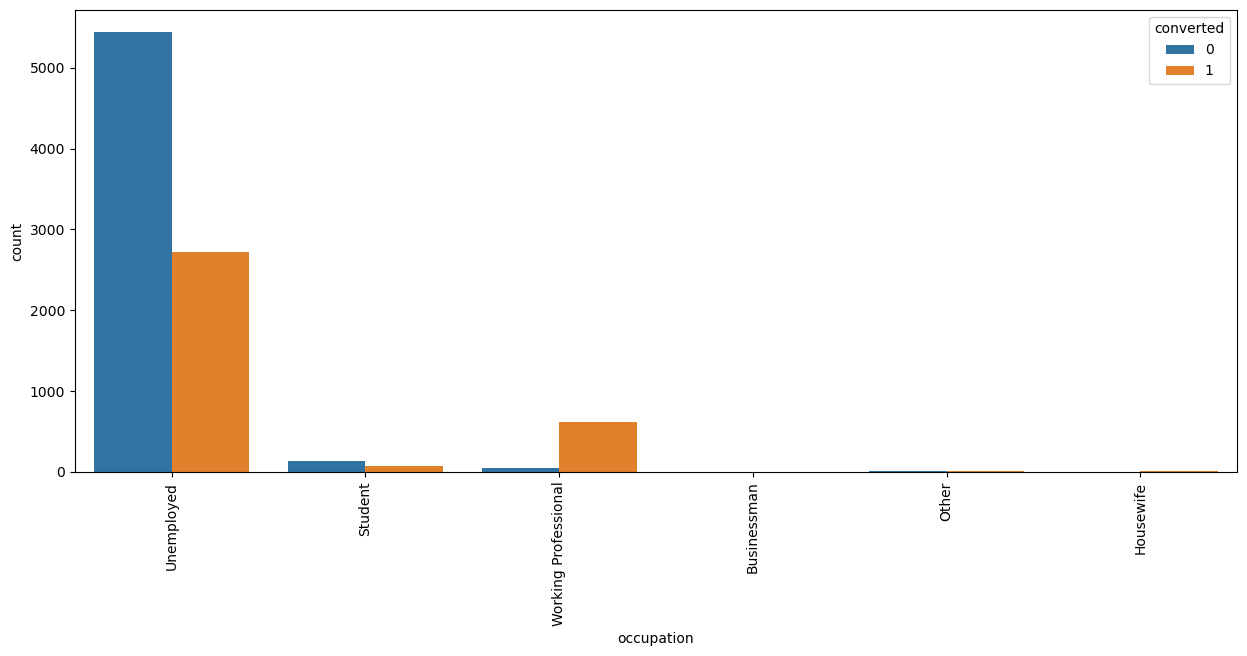

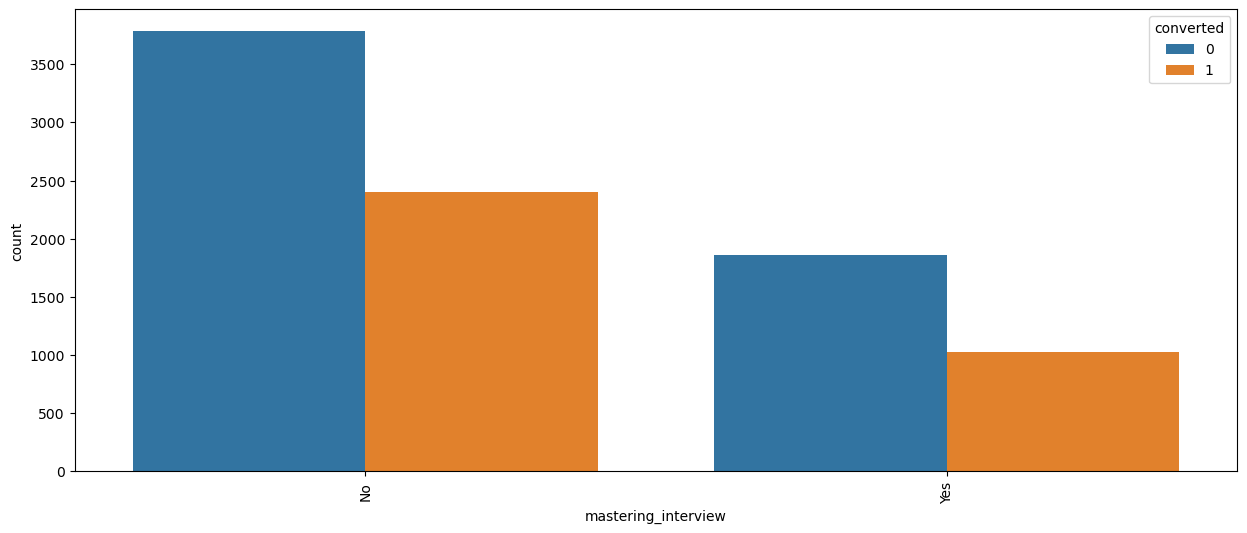

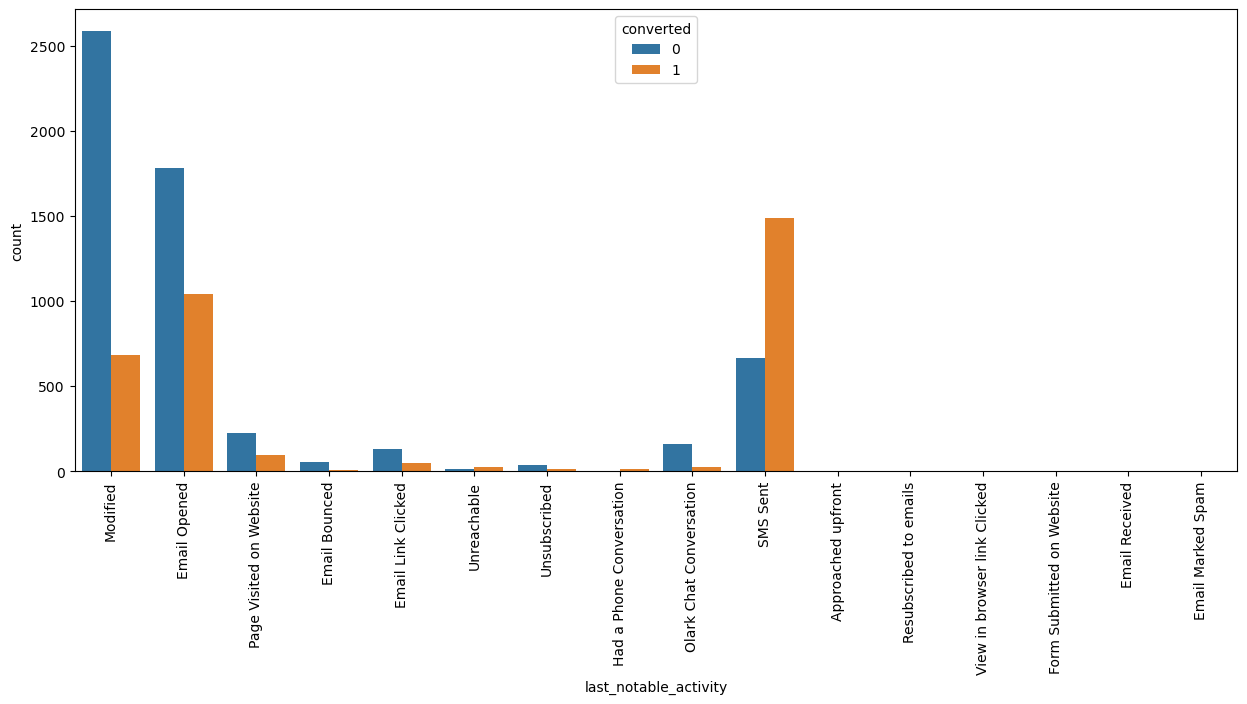

In [38]:
for i in cat_cols:
    plt.figure(figsize=(15,6))
    sns.countplot(x=leads[i], hue='converted', data=leads)
    plt.xticks(rotation =90)
    plt.show()

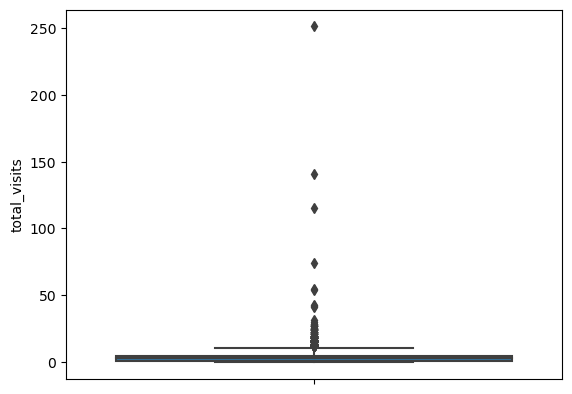

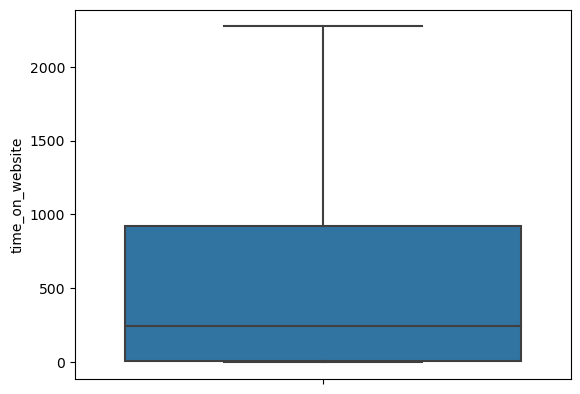

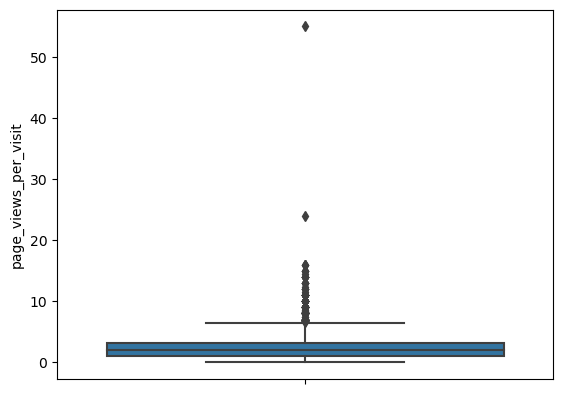

In [39]:
for i in num_cols:
    sns.boxplot(x=leads[i], data=leads, orient='vert')
    plt.show()

As we can see that there are many outliers in total_visits and page_views_per_visit

In [40]:
# We can analyse the both columns in percentiles

percetiles = leads['total_visits'].quantile([0.05,0.95]).values
leads['total_visits'][leads['total_visits'] <= percetiles[0]] = percetiles[0]
leads['total_visits'][leads['total_visits'] >= percetiles[1]] = percetiles[1]

percetiles = leads['page_views_per_visit'].quantile([0.05,0.95]).values
leads['page_views_per_visit'][leads['page_views_per_visit'] <= percetiles[0]] = percetiles[0]
leads['page_views_per_visit'][leads['page_views_per_visit'] >= percetiles[1]] = percetiles[1]

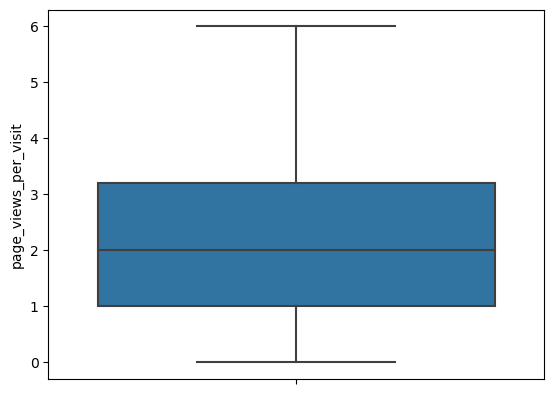

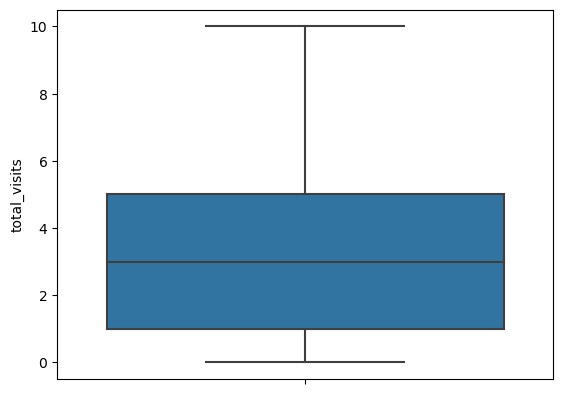

In [41]:
# Checking outliers for both columns again

sns.boxplot(leads['page_views_per_visit'],orient='vert')
plt.show()
                  
sns.boxplot(leads['total_visits'],orient='vert')
plt.show()

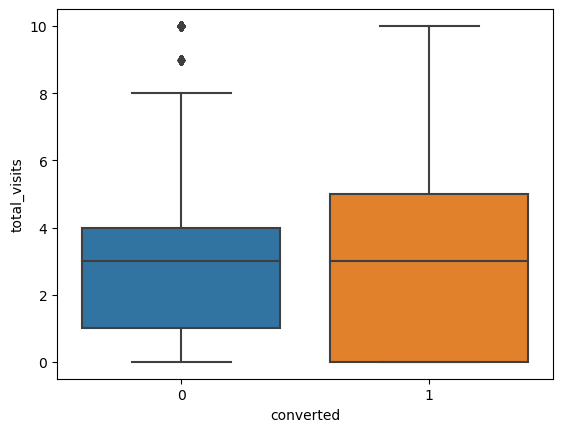

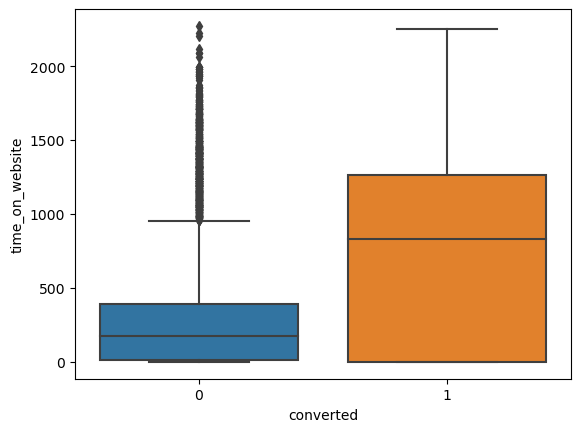

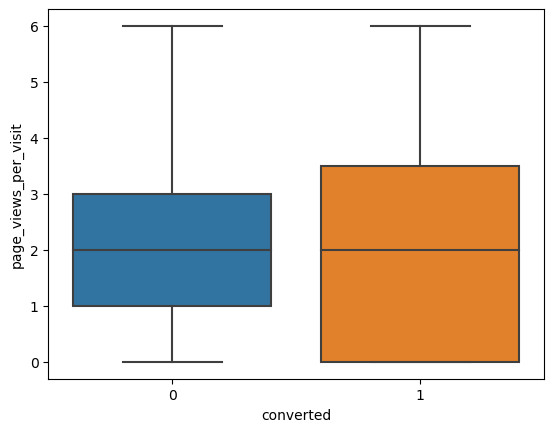

In [42]:
# Checking the numerical cols with converted

for i in num_cols:
    sns.boxplot(y=leads[i], x='converted', data=leads, orient='vert')
    plt.show()

### Observation

We can see that for total_visits and page_views_per_list have same median for coverted and non-converted

### Dummy variable creation


In [43]:
# Check the columns which are of type 'object'

temp = leads.loc[:, leads.dtypes == "object"]
temp.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'last_activity',
       'specialization', 'occupation', 'mastering_interview',
       'last_notable_activity'],
      dtype='object')

In [44]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(leads[['lead_origin', 'lead_source', 'do_not_email', 'last_activity',
                              'specialization','occupation','mastering_interview', 
                              'last_notable_activity']], drop_first=True)

# Add the results to the master dataframe
leads = pd.concat([leads, dummy], axis=1)

In [45]:
# Drop the variables for which the dummy variables have been created

leads = leads.drop(['lead_origin', 'lead_source', 'do_not_email', 'last_activity',
                    'specialization','occupation','mastering_interview', 
                    'last_notable_activity'], 1)

In [46]:
# Checking the dataset again

leads.head()

,converted,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


### Test-Train Split


In [47]:
# Put all the feature variables in X

X = leads.drop('converted', axis=1)
X.head()

,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Live Chat,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
# Put the target variable in y

y = leads.converted
y.head()

0    0
1    0
2    1
3    0
4    1
Name: converted, dtype: int64

In [49]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

### Scaling


In [50]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

# Normalization using MinMax scaler
num_vars = ['total_visits', 'time_on_website', 'page_views_per_visit']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

# Checking the dataset
X_train.head()

,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Live Chat,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
3009,0.2,0.178347,0.333333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,0.2,0.085355,0.333333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0.0,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0.2,0.619946,0.333333,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.5,0.711590,0.416667,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [51]:
# looking at the info for scaler
X_train.describe()

,total_visits,time_on_website,page_views_per_visit,lead_origin_Landing Page Submission,lead_origin_Lead Add Form,lead_origin_Lead Import,lead_source_Direct Traffic,lead_source_Facebook,lead_source_Google,lead_source_Live Chat,...,last_notable_activity_Form Submitted on Website,last_notable_activity_Had a Phone Conversation,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website,last_notable_activity_Resubscribed to emails,last_notable_activity_SMS Sent,last_notable_activity_Unreachable,last_notable_activity_Unsubscribed,last_notable_activity_View in browser link Clicked
count,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,...,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000,6351.000000
mean,0.320627,0.217585,0.379863,0.535979,0.068651,0.003779,0.278066,0.003936,0.320107,0.000315,...,0.000157,0.001889,0.359471,0.019052,0.034483,0.000157,0.244371,0.004094,0.004409,0.000157
std,0.278748,0.244868,0.300183,0.498743,0.252879,0.061362,0.448082,0.062622,0.466554,0.017744,...,0.012548,0.043430,0.479883,0.136719,0.182480,0.012548,0.429747,0.063857,0.066257,0.012548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.100000,0.004492,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.300000,0.110961,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.413522,0.555000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Looking at the correlations


In [52]:
leads.columns

Index(['converted', 'total_visits', 'time_on_website', 'page_views_per_visit',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_origin_Lead Import', 'lead_source_Direct Traffic',
       'lead_source_Facebook', 'lead_source_Google', 'lead_source_Live Chat',
       'lead_source_NC_EDM', 'lead_source_Olark Chat',
       'lead_source_Organic Search', 'lead_source_Pay per Click Ads',
       'lead_source_Press_Release', 'lead_source_Reference',
       'lead_source_Referral Sites', 'lead_source_Social Media',
       'lead_source_WeLearn', 'lead_source_Welingak Website',
       'lead_source_bing', 'lead_source_blog', 'lead_source_google',
       'lead_source_testone', 'lead_source_welearnblog_Home',
       'lead_source_youtubechannel', 'do_not_email_Yes',
       'last_activity_Converted to Lead', 'last_activity_Email Bounced',
       'last_activity_Email Link Clicked', 'last_activity_Email Marked Spam',
       'last_activity_Email Opened', 'last_activity_

In [53]:
corr_columns = ['converted', 'total_visits',
       'time_on_website', 'page_views_per_visit',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_origin_Lead Import', 'lead_source_Facebook', 'lead_source_Google',
       'lead_source_Olark Chat', 'lead_source_Organic Search',
       'lead_source_Reference','lead_source_Referral Sites', 'lead_source_Welingak Website','occupation_Housewife', 
       'occupation_Other', 'occupation_Student','occupation_Unemployed', 'occupation_Working Professional',
       'last_activity_Olark Chat Conversation']

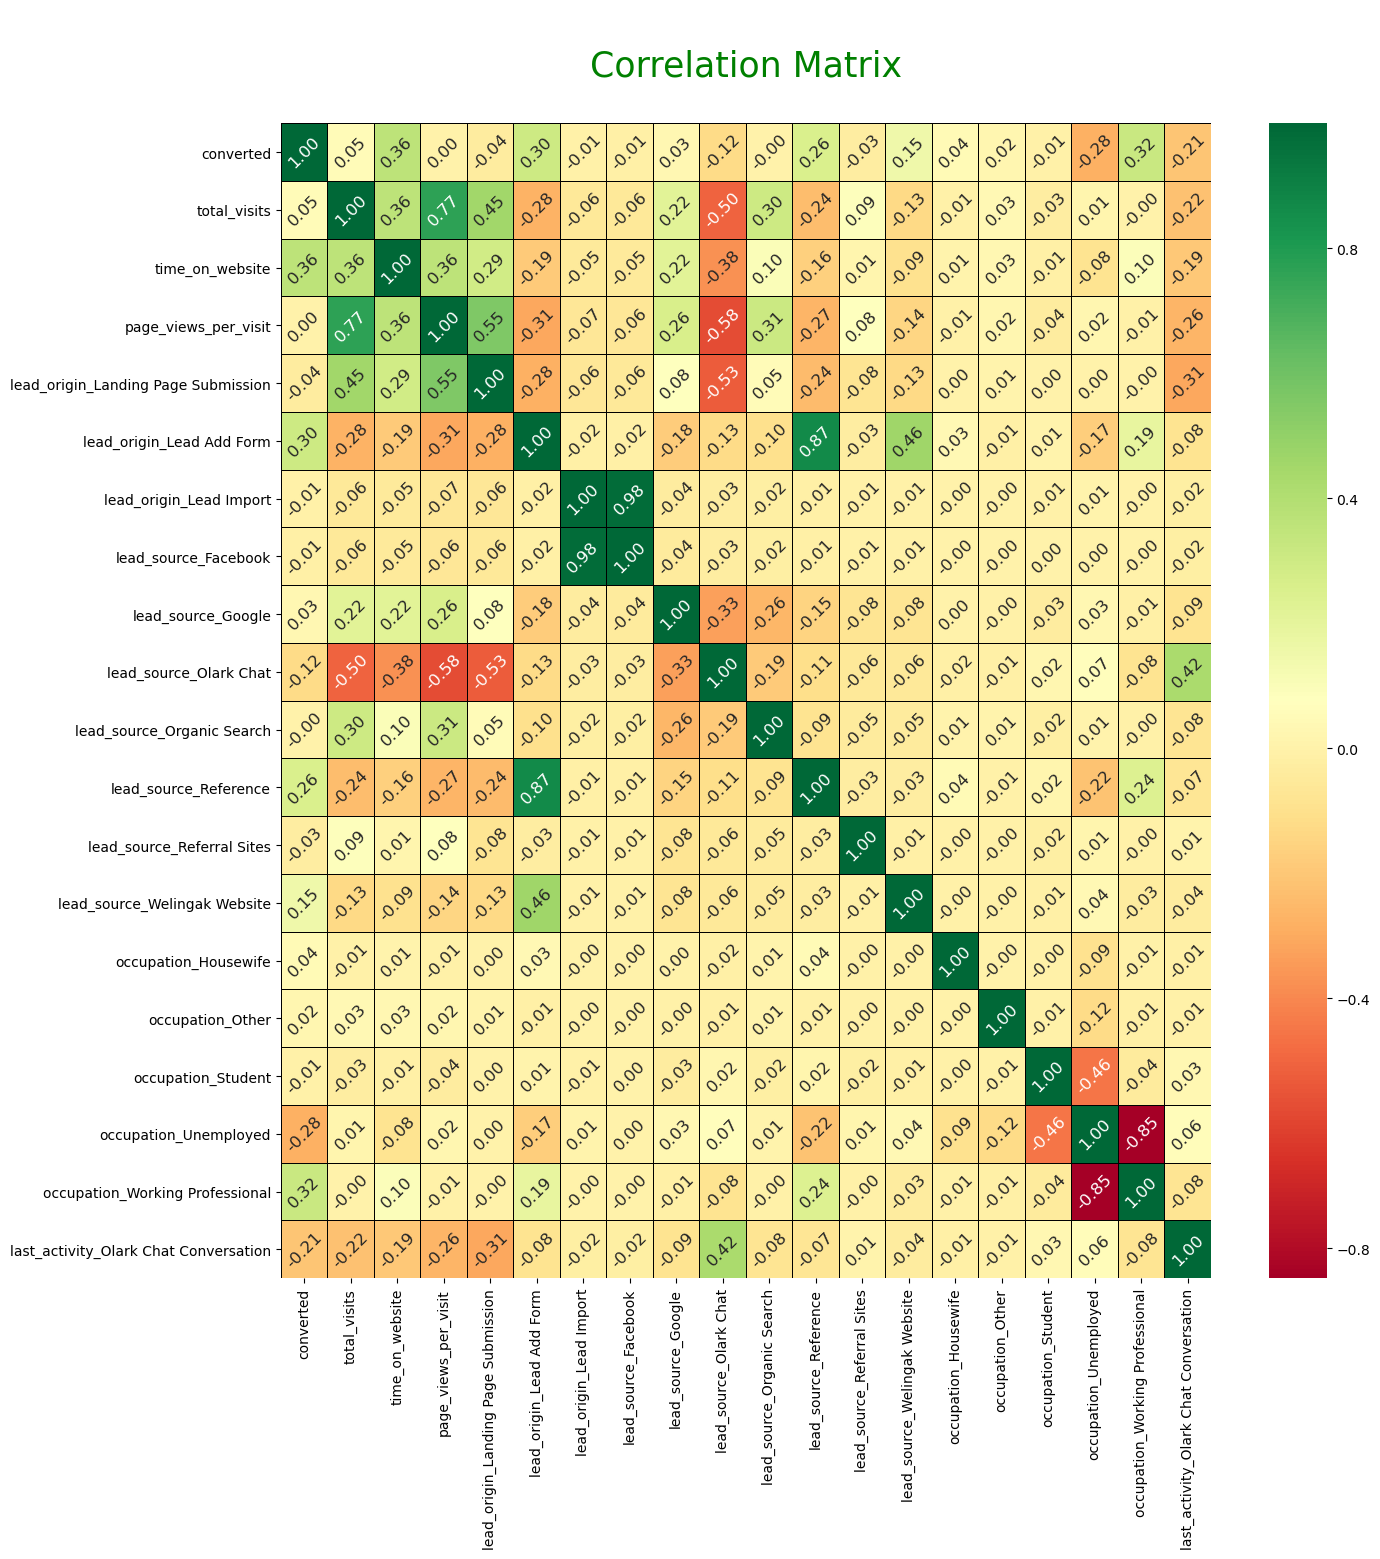

In [54]:
# Looking at the correlation using heatmap

fig = plt.figure(figsize=(15,15))
sns.heatmap(leads[corr_columns].corr(), cmap="RdYlGn", annot=True, 
                 annot_kws = {'size':12, 'rotation': 45, 'fontweight': 40}, 
                linewidth = 0.5, linecolor ='black', fmt='.2f')
plt.title("\nCorrelation Matrix\n", fontsize = 25, fontweight = 20, color = 'green')
plt.show()

From the above Correlation Matrix, it's clear that 'lead_source_Facebook' & 'lead_origin_Lead Import' ,'lead_origin_Lead Add Form' & 'lead_source_Reference' have good correlation.

## Step 3: Model Building


In [55]:
logreg = LogisticRegression()

In [56]:
# Import RFE and select 20 variables

rfe = RFE(estimator=logreg, n_features_to_select=20)             
rfe = rfe.fit(X_train, y_train)

In [57]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('total_visits', True, 1),
 ('time_on_website', True, 1),
 ('page_views_per_visit', True, 1),
 ('lead_origin_Landing Page Submission', True, 1),
 ('lead_origin_Lead Add Form', True, 1),
 ('lead_origin_Lead Import', False, 28),
 ('lead_source_Direct Traffic', False, 2),
 ('lead_source_Facebook', False, 50),
 ('lead_source_Google', False, 4),
 ('lead_source_Live Chat', False, 36),
 ('lead_source_NC_EDM', False, 32),
 ('lead_source_Olark Chat', False, 14),
 ('lead_source_Organic Search', False, 3),
 ('lead_source_Pay per Click Ads', False, 43),
 ('lead_source_Press_Release', False, 46),
 ('lead_source_Reference', False, 10),
 ('lead_source_Referral Sites', True, 1),
 ('lead_source_Social Media', False, 24),
 ('lead_source_WeLearn', False, 63),
 ('lead_source_Welingak Website', True, 1),
 ('lead_source_bing', False, 55),
 ('lead_source_blog', False, 30),
 ('lead_source_google', False, 11),
 ('lead_source_testone', False, 40),
 ('lead_source_welearnblog_Home', False, 37),
 ('lead_source_yo

In [58]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [59]:
# Select only the columns selected by RFE

X_train.columns[~rfe.support_]

Index(['lead_origin_Lead Import', 'lead_source_Direct Traffic',
       'lead_source_Facebook', 'lead_source_Google', 'lead_source_Live Chat',
       'lead_source_NC_EDM', 'lead_source_Olark Chat',
       'lead_source_Organic Search', 'lead_source_Pay per Click Ads',
       'lead_source_Press_Release', 'lead_source_Reference',
       'lead_source_Social Media', 'lead_source_WeLearn', 'lead_source_bing',
       'lead_source_blog', 'lead_source_google', 'lead_source_testone',
       'lead_source_welearnblog_Home', 'lead_source_youtubechannel',
       'last_activity_Email Link Clicked', 'last_activity_Email Marked Spam',
       'last_activity_Email Opened', 'last_activity_Email Received',
       'last_activity_Form Submitted on Website',
       'last_activity_Page Visited on Website',
       'last_activity_Resubscribed to emails', 'last_activity_SMS Sent',
       'last_activity_Unreachable', 'last_activity_Unsubscribed',
       'last_activity_View in browser link Clicked',
       'last_act

In [60]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2593.1
Date:                Mon, 29 Jul 2024   Deviance:                       5186.2
Time:                        14:57:25   Pearson chi2:                 6.28e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4034
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.0543      0.143      7.394      0.000       0.775       1.334
total_visits                                      0.7762      0.193      4.029      0.000       0.399       1.154
time_on_website                                   4.1571      0.158     26.379      0.000       3.848       4.466
page_views_per_visit                             -1.4394      0.195     -7.393      0.000      -1.821      -1.058
lead_origin_Landing Page Submission              -1.2976      0.124    -10.437      0.000      -1.541      -1.054
lead_origin_Lead Add Form                         2.5527      0.231     11.071      0.000       2.101       3.005
lead_source_Referral Sites                       -0.4566      0.333     -1.373      0.170      -1.108       0.195
lead_source_Welingak Website                      2.6497      0.759      3.493      0.000       1.163       4.136
do_not_email_Yes                                 -1.5647      0.202     -7.764      0.000      -1.960      -1.170
last_activity_Converted to Lead                  -1.2487      0.227     -5.498      0.000      -1.694      -0.804
last_activity_Email Bounced                      -1.3355      0.433     -3.086      0.002      -2.184      -0.487
last_activity_Had a Phone Conversation            1.7241      0.780      2.210      0.027       0.195       3.253
last_activity_Olark Chat Conversation            -1.2112      0.197     -6.164      0.000      -1.596      -0.826
specialization_others                            -1.1053      0.126     -8.793      0.000      -1.352      -0.859
occupation_Housewife                             22.4809   1.55e+04      0.001      0.999   -3.04e+04    3.05e+04
occupation_Working Professional                   2.6338      0.194     13.585      0.000       2.254       3.014
last_notable_activity_Email Link Clicked         -1.8887      0.261     -7.245      0.000      -2.400      -1.378
last_notable_activity_Email Opened               -1.4767      0.089    -16.632      0.000      -1.651      -1.303
last_notable_activity_Modified                   -1.7900      0.101    -17.752      0.000      -1.988      -1.592
last_notable_activity_Olark Chat Conversation    -1.5098      0.378     -3.991      0.000      -2.251      -0.768
last_notable_activity_Page Visited on Website    -2.0174      0.210     -9.607      0.000      -2.429      -1.606
=================================================================================================================
"""

In [61]:
# Since occupation_Housewife the p-value is higher so we can drop this column
col = col.drop('occupation_Housewife', 1)
col

Index(['total_visits', 'time_on_website', 'page_views_per_visit',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_source_Referral Sites', 'lead_source_Welingak Website',
       'do_not_email_Yes', 'last_activity_Converted to Lead',
       'last_activity_Email Bounced', 'last_activity_Had a Phone Conversation',
       'last_activity_Olark Chat Conversation', 'specialization_others',
       'occupation_Working Professional',
       'last_notable_activity_Email Link Clicked',
       'last_notable_activity_Email Opened', 'last_notable_activity_Modified',
       'last_notable_activity_Olark Chat Conversation',
       'last_notable_activity_Page Visited on Website'],
      dtype='object')

In [62]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2597.0
Date:                Mon, 29 Jul 2024   Deviance:                       5194.0
Time:                        14:57:25   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4026
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.0579      0.143      7.421      0.000       0.778       1.337
total_visits                                      0.7725      0.193      4.012      0.000       0.395       1.150
time_on_website                                   4.1575      0.157     26.401      0.000       3.849       4.466
page_views_per_visit                             -1.4439      0.195     -7.419      0.000      -1.825      -1.062
lead_origin_Landing Page Submission              -1.2959      0.124    -10.431      0.000      -1.539      -1.052
lead_origin_Lead Add Form                         2.5673      0.230     11.146      0.000       2.116       3.019
lead_source_Referral Sites                       -0.4553      0.333     -1.369      0.171      -1.107       0.197
lead_source_Welingak Website                      2.6345      0.758      3.473      0.001       1.148       4.121
do_not_email_Yes                                 -1.5658      0.202     -7.768      0.000      -1.961      -1.171
last_activity_Converted to Lead                  -1.2499      0.227     -5.503      0.000      -1.695      -0.805
last_activity_Email Bounced                      -1.3351      0.433     -3.085      0.002      -2.183      -0.487
last_activity_Had a Phone Conversation            1.7253      0.780      2.211      0.027       0.196       3.254
last_activity_Olark Chat Conversation            -1.2100      0.197     -6.157      0.000      -1.595      -0.825
specialization_others                            -1.1106      0.126     -8.838      0.000      -1.357      -0.864
occupation_Working Professional                   2.6297      0.194     13.562      0.000       2.250       3.010
last_notable_activity_Email Link Clicked         -1.8798      0.259     -7.245      0.000      -2.388      -1.371
last_notable_activity_Email Opened               -1.4701      0.089    -16.572      0.000      -1.644      -1.296
last_notable_activity_Modified                   -1.7895      0.101    -17.747      0.000      -1.987      -1.592
last_notable_activity_Olark Chat Conversation    -1.5091      0.378     -3.988      0.000      -2.251      -0.767
last_notable_activity_Page Visited on Website    -2.0164      0.210     -9.602      0.000      -2.428      -1.605
=================================================================================================================
"""

In [63]:
# Since last_activity_Had a Phone Conversation col has high p-value so we can drop the column.

col = col.drop('last_activity_Had a Phone Conversation', 1)
col

Index(['total_visits', 'time_on_website', 'page_views_per_visit',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_source_Referral Sites', 'lead_source_Welingak Website',
       'do_not_email_Yes', 'last_activity_Converted to Lead',
       'last_activity_Email Bounced', 'last_activity_Olark Chat Conversation',
       'specialization_others', 'occupation_Working Professional',
       'last_notable_activity_Email Link Clicked',
       'last_notable_activity_Email Opened', 'last_notable_activity_Modified',
       'last_notable_activity_Olark Chat Conversation',
       'last_notable_activity_Page Visited on Website'],
      dtype='object')

In [64]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.0
Date:                Mon, 29 Jul 2024   Deviance:                       5199.9
Time:                        14:57:25   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4021
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             1.0645      0.142      7.476      0.000       0.785       1.344
total_visits                                      0.7789      0.192      4.052      0.000       0.402       1.156
time_on_website                                   4.1552      0.157     26.412      0.000       3.847       4.464
page_views_per_visit                             -1.4395      0.194     -7.406      0.000      -1.821      -1.059
lead_origin_Landing Page Submission              -1.2972      0.124    -10.451      0.000      -1.540      -1.054
lead_origin_Lead Add Form                         2.5652      0.230     11.137      0.000       2.114       3.017
lead_source_Referral Sites                       -0.4314      0.328     -1.314      0.189      -1.075       0.212
lead_source_Welingak Website                      2.6347      0.759      3.474      0.001       1.148       4.121
do_not_email_Yes                                 -1.5704      0.202     -7.785      0.000      -1.966      -1.175
last_activity_Converted to Lead                  -1.2569      0.227     -5.537      0.000      -1.702      -0.812
last_activity_Email Bounced                      -1.3385      0.433     -3.093      0.002      -2.187      -0.490
last_activity_Olark Chat Conversation            -1.2184      0.196     -6.202      0.000      -1.603      -0.833
specialization_others                            -1.1103      0.126     -8.843      0.000      -1.356      -0.864
occupation_Working Professional                   2.6262      0.194     13.546      0.000       2.246       3.006
last_notable_activity_Email Link Clicked         -1.8889      0.259     -7.283      0.000      -2.397      -1.381
last_notable_activity_Email Opened               -1.4796      0.089    -16.696      0.000      -1.653      -1.306
last_notable_activity_Modified                   -1.7900      0.101    -17.774      0.000      -1.987      -1.593
last_notable_activity_Olark Chat Conversation    -1.5091      0.378     -3.988      0.000      -2.251      -0.767
last_notable_activity_Page Visited on Website    -2.0276      0.210     -9.660      0.000      -2.439      -1.616
=================================================================================================================
"""

In [65]:
# Checking for VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,page_views_per_visit,7.60
0,total_visits,6.30
3,lead_origin_Landing Page Submission,4.28
15,last_notable_activity_Modified,2.75
11,specialization_others,2.24
1,time_on_website,2.10
10,last_activity_Olark Chat Conversation,1.94
14,last_notable_activity_Email Opened,1.89
7,do_not_email_Yes,1.85
9,last_activity_Email Bounced,1.78


In [66]:
# we can see that lead_origin_Landing Page Submission has high VIF value
col = col.drop("lead_origin_Landing Page Submission",1)
col

Index(['total_visits', 'time_on_website', 'page_views_per_visit',
       'lead_origin_Lead Add Form', 'lead_source_Referral Sites',
       'lead_source_Welingak Website', 'do_not_email_Yes',
       'last_activity_Converted to Lead', 'last_activity_Email Bounced',
       'last_activity_Olark Chat Conversation', 'specialization_others',
       'occupation_Working Professional',
       'last_notable_activity_Email Link Clicked',
       'last_notable_activity_Email Opened', 'last_notable_activity_Modified',
       'last_notable_activity_Olark Chat Conversation',
       'last_notable_activity_Page Visited on Website'],
      dtype='object')

In [67]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2656.9
Date:                Mon, 29 Jul 2024   Deviance:                       5313.8
Time:                        14:57:26   Pearson chi2:                 6.29e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3913
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1016      0.106      0.954      0.340      -0.107       0.310
total_visits                                      0.8311      0.190      4.379      0.000       0.459       1.203
time_on_website                                   4.1049      0.155     26.507      0.000       3.801       4.408
page_views_per_visit                             -1.8139      0.191     -9.488      0.000      -2.189      -1.439
lead_origin_Lead Add Form                         3.0964      0.224     13.843      0.000       2.658       3.535
lead_source_Referral Sites                       -0.2741      0.327     -0.839      0.401      -0.914       0.366
lead_source_Welingak Website                      2.1528      0.756      2.848      0.004       0.671       3.635
do_not_email_Yes                                 -1.5975      0.198     -8.053      0.000      -1.986      -1.209
last_activity_Converted to Lead                  -1.3850      0.226     -6.134      0.000      -1.828      -0.942
last_activity_Email Bounced                      -1.3986      0.423     -3.307      0.001      -2.228      -0.570
last_activity_Olark Chat Conversation            -1.0675      0.191     -5.590      0.000      -1.442      -0.693
specialization_others                            -0.1656      0.086     -1.922      0.055      -0.334       0.003
occupation_Working Professional                   2.7088      0.189     14.316      0.000       2.338       3.080
last_notable_activity_Email Link Clicked         -1.8715      0.260     -7.208      0.000      -2.380      -1.363
last_notable_activity_Email Opened               -1.4381      0.088    -16.428      0.000      -1.610      -1.267
last_notable_activity_Modified                   -1.7632      0.100    -17.715      0.000      -1.958      -1.568
last_notable_activity_Olark Chat Conversation    -1.5379      0.370     -4.151      0.000      -2.264      -0.812
last_notable_activity_Page Visited on Website    -2.0403      0.209     -9.784      0.000      -2.449      -1.632
=================================================================================================================
"""

In [68]:
# Checking for VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,page_views_per_visit,6.51
0,total_visits,6.28
14,last_notable_activity_Modified,2.52
1,time_on_website,2.03
9,last_activity_Olark Chat Conversation,1.94
6,do_not_email_Yes,1.83
8,last_activity_Email Bounced,1.78
10,specialization_others,1.74
13,last_notable_activity_Email Opened,1.68
3,lead_origin_Lead Add Form,1.50


In [69]:
# lead_source_Referral Sites having high p-value so we will drop the col
col = col.drop('lead_source_Referral Sites', 1)
col

Index(['total_visits', 'time_on_website', 'page_views_per_visit',
       'lead_origin_Lead Add Form', 'lead_source_Welingak Website',
       'do_not_email_Yes', 'last_activity_Converted to Lead',
       'last_activity_Email Bounced', 'last_activity_Olark Chat Conversation',
       'specialization_others', 'occupation_Working Professional',
       'last_notable_activity_Email Link Clicked',
       'last_notable_activity_Email Opened', 'last_notable_activity_Modified',
       'last_notable_activity_Olark Chat Conversation',
       'last_notable_activity_Page Visited on Website'],
      dtype='object')

In [70]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2657.2
Date:                Mon, 29 Jul 2024   Deviance:                       5314.5
Time:                        14:57:26   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3912
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.1091      0.106      1.028      0.304      -0.099       0.317
total_visits                                      0.8224      0.189      4.342      0.000       0.451       1.194
time_on_website                                   4.1049      0.155     26.510      0.000       3.801       4.408
page_views_per_visit                             -1.8208      0.191     -9.535      0.000      -2.195      -1.447
lead_origin_Lead Add Form                         3.0944      0.224     13.835      0.000       2.656       3.533
lead_source_Welingak Website                      2.1580      0.756      2.854      0.004       0.676       3.640
do_not_email_Yes                                 -1.5981      0.199     -8.051      0.000      -1.987      -1.209
last_activity_Converted to Lead                  -1.3859      0.226     -6.141      0.000      -1.828      -0.944
last_activity_Email Bounced                      -1.3973      0.423     -3.303      0.001      -2.226      -0.568
last_activity_Olark Chat Conversation            -1.0691      0.191     -5.596      0.000      -1.444      -0.695
specialization_others                            -0.1754      0.085     -2.055      0.040      -0.343      -0.008
occupation_Working Professional                   2.7040      0.189     14.297      0.000       2.333       3.075
last_notable_activity_Email Link Clicked         -1.8733      0.260     -7.219      0.000      -2.382      -1.365
last_notable_activity_Email Opened               -1.4396      0.088    -16.447      0.000      -1.611      -1.268
last_notable_activity_Modified                   -1.7657      0.099    -17.749      0.000      -1.961      -1.571
last_notable_activity_Olark Chat Conversation    -1.5325      0.370     -4.137      0.000      -2.259      -0.806
last_notable_activity_Page Visited on Website    -2.0435      0.209     -9.800      0.000      -2.452      -1.635
=================================================================================================================
"""

In [71]:
# Checking for VIF

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,page_views_per_visit,6.51
0,total_visits,6.27
13,last_notable_activity_Modified,2.52
1,time_on_website,2.02
8,last_activity_Olark Chat Conversation,1.94
5,do_not_email_Yes,1.83
7,last_activity_Email Bounced,1.78
9,specialization_others,1.72
12,last_notable_activity_Email Opened,1.68
3,lead_origin_Lead Add Form,1.50


In [72]:
col = col.drop('specialization_others', 1)
col

Index(['total_visits', 'time_on_website', 'page_views_per_visit',
       'lead_origin_Lead Add Form', 'lead_source_Welingak Website',
       'do_not_email_Yes', 'last_activity_Converted to Lead',
       'last_activity_Email Bounced', 'last_activity_Olark Chat Conversation',
       'occupation_Working Professional',
       'last_notable_activity_Email Link Clicked',
       'last_notable_activity_Email Opened', 'last_notable_activity_Modified',
       'last_notable_activity_Olark Chat Conversation',
       'last_notable_activity_Page Visited on Website'],
      dtype='object')

In [73]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2659.4
Date:                Mon, 29 Jul 2024   Deviance:                       5318.7
Time:                        14:57:26   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3908
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.0095      0.089     -0.107      0.915      -0.184       0.165
total_visits                                      0.8579      0.189      4.546      0.000       0.488       1.228
time_on_website                                   4.1427      0.154     26.911      0.000       3.841       4.444
page_views_per_visit                             -1.7265      0.185     -9.332      0.000      -2.089      -1.364
lead_origin_Lead Add Form                         3.1493      0.222     14.174      0.000       2.714       3.585
lead_source_Welingak Website                      2.0586      0.754      2.729      0.006       0.580       3.537
do_not_email_Yes                                 -1.5891      0.199     -7.985      0.000      -1.979      -1.199
last_activity_Converted to Lead                  -1.3720      0.225     -6.084      0.000      -1.814      -0.930
last_activity_Email Bounced                      -1.3935      0.423     -3.291      0.001      -2.223      -0.564
last_activity_Olark Chat Conversation            -1.1179      0.189     -5.905      0.000      -1.489      -0.747
occupation_Working Professional                   2.7366      0.188     14.536      0.000       2.368       3.106
last_notable_activity_Email Link Clicked         -1.8725      0.259     -7.239      0.000      -2.379      -1.366
last_notable_activity_Email Opened               -1.4375      0.088    -16.426      0.000      -1.609      -1.266
last_notable_activity_Modified                   -1.7675      0.099    -17.770      0.000      -1.962      -1.573
last_notable_activity_Olark Chat Conversation    -1.5367      0.370     -4.157      0.000      -2.261      -0.812
last_notable_activity_Page Visited on Website    -2.0480      0.208     -9.827      0.000      -2.456      -1.640
=================================================================================================================
"""

In [74]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,page_views_per_visit,6.49
0,total_visits,6.27
12,last_notable_activity_Modified,2.32
1,time_on_website,2.02
5,do_not_email_Yes,1.83
8,last_activity_Olark Chat Conversation,1.80
7,last_activity_Email Bounced,1.78
3,lead_origin_Lead Add Form,1.50
11,last_notable_activity_Email Opened,1.50
13,last_notable_activity_Olark Chat Conversation,1.35


In [75]:
col = col.drop('total_visits', 1)
col

Index(['time_on_website', 'page_views_per_visit', 'lead_origin_Lead Add Form',
       'lead_source_Welingak Website', 'do_not_email_Yes',
       'last_activity_Converted to Lead', 'last_activity_Email Bounced',
       'last_activity_Olark Chat Conversation',
       'occupation_Working Professional',
       'last_notable_activity_Email Link Clicked',
       'last_notable_activity_Email Opened', 'last_notable_activity_Modified',
       'last_notable_activity_Olark Chat Conversation',
       'last_notable_activity_Page Visited on Website'],
      dtype='object')

In [76]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2669.7
Date:                Mon, 29 Jul 2024   Deviance:                       5339.3
Time:                        14:57:26   Pearson chi2:                 6.32e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3888
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             0.0273      0.088      0.310      0.756      -0.145       0.200
time_on_website                                   4.2058      0.153     27.400      0.000       3.905       4.507
page_views_per_visit                             -1.1645      0.135     -8.617      0.000      -1.429      -0.900
lead_origin_Lead Add Form                         3.0954      0.222     13.957      0.000       2.661       3.530
lead_source_Welingak Website                      2.0574      0.754      2.727      0.006       0.579       3.536
do_not_email_Yes                                 -1.6050      0.199     -8.082      0.000      -1.994      -1.216
last_activity_Converted to Lead                  -1.4411      0.226     -6.387      0.000      -1.883      -0.999
last_activity_Email Bounced                      -1.3890      0.422     -3.295      0.001      -2.215      -0.563
last_activity_Olark Chat Conversation            -1.1268      0.189     -5.968      0.000      -1.497      -0.757
occupation_Working Professional                   2.7313      0.188     14.547      0.000       2.363       3.099
last_notable_activity_Email Link Clicked         -1.8216      0.256     -7.103      0.000      -2.324      -1.319
last_notable_activity_Email Opened               -1.4104      0.087    -16.206      0.000      -1.581      -1.240
last_notable_activity_Modified                   -1.7561      0.099    -17.687      0.000      -1.951      -1.562
last_notable_activity_Olark Chat Conversation    -1.4599      0.364     -4.010      0.000      -2.174      -0.746
last_notable_activity_Page Visited on Website    -1.7898      0.200     -8.971      0.000      -2.181      -1.399
=================================================================================================================
"""

In [77]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,page_views_per_visit,2.65
11,last_notable_activity_Modified,2.31
0,time_on_website,1.98
4,do_not_email_Yes,1.83
7,last_activity_Olark Chat Conversation,1.80
6,last_activity_Email Bounced,1.77
2,lead_origin_Lead Add Form,1.50
10,last_notable_activity_Email Opened,1.48
12,last_notable_activity_Olark Chat Conversation,1.35
3,lead_source_Welingak Website,1.33


Since the Pvalues of all variables is less than 0.05 and VIF values are low for all the variables, model-7 is our final model. We have 14 variables in our final model.

In [78]:
X_train_sm.columns

Index(['const', 'time_on_website', 'page_views_per_visit',
       'lead_origin_Lead Add Form', 'lead_source_Welingak Website',
       'do_not_email_Yes', 'last_activity_Converted to Lead',
       'last_activity_Email Bounced', 'last_activity_Olark Chat Conversation',
       'occupation_Working Professional',
       'last_notable_activity_Email Link Clicked',
       'last_notable_activity_Email Opened', 'last_notable_activity_Modified',
       'last_notable_activity_Olark Chat Conversation',
       'last_notable_activity_Page Visited on Website'],
      dtype='object')

## Step 4: Model Evaluation on train set


In [79]:
# Using 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.264810
1012    0.434261
9226    0.150745
4750    0.904354
7987    0.685434
1281    0.817330
2880    0.123713
4971    0.850504
7536    0.799602
1248    0.670736
dtype: float64

In [80]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26481032, 0.43426061, 0.15074501, 0.90435413, 0.68543394,
       0.81733043, 0.12371338, 0.85050442, 0.79960176, 0.67073639])

#### Creating a dataframe with the actual conversion flag and the predicted probabilities

In [81]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.264810,3009
1,0,0.434261,1012
2,0,0.150745,9226
3,1,0.904354,4750
4,1,0.685434,7987


#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

In [82]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted
0,0,0.264810,3009,0
1,0,0.434261,1012,0
2,0,0.150745,9226,0
3,1,0.904354,4750,1
4,1,0.685434,7987,1


In [83]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [84]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3414  491]
 [ 705 1741]]


In [85]:
# The confusion matrix indicates as below
# Predicted     not_converted    converted
# Actual
# not_converted        3414      491
# converted            705       1741  

In [86]:
# Let's check the overall accuracy

print('Accuracy: ',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

Accuracy:  0.8116831994961423


In [87]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

TPR = TP/(TP + FN) # true positive rate
TNR = TN/(TN + FP) # true negative rate
FPR = FP/(TN + FP) # false positive rate
FNR = FN/(TP + FN) # false negative rate

print ("True Negatives: ", TN)
print ("False Positves: ", FP)
print ("False Negatives: ", FN)
print ("True Positives: ", TP)

print("              ")

PPV = TP /(TP + FP) # positive predictive value
NPV = TN /(TN + FN) # negative predictive value

print ("Positive Predictive Value: ", PPV)
print ("Negative Predictive Value: ", NPV)

True Negatives:  3414
False Positves:  491
False Negatives:  705
True Positives:  1741
              
Positive Predictive Value:  0.7800179211469535
Negative Predictive Value:  0.8288419519300801


In [88]:
# Calculate the sensitivity

sen = TP/float(TP+FN)
print("Sensitivity: ", sen)

Sensitivity:  0.7117743254292723


In [89]:
# Calculate the specificity

spec = TN/float(TN+FP)
print("Specificity: ", spec)

Specificity:  0.8742637644046095


We found that our specificity was good(~88%) but our sensitivity was only (71%) Hence, this needed to be taken care of.

We have got sensitivity of 71% and this was mainly because of the cut-off point of 0.5 that we had arbitrarily chosen. Now, this cut-off point had to be optimised in order to get a decent value of sensitivity and for this we will use the ROC curve.

### Finding the Optimal Cutoff


In [90]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [91]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

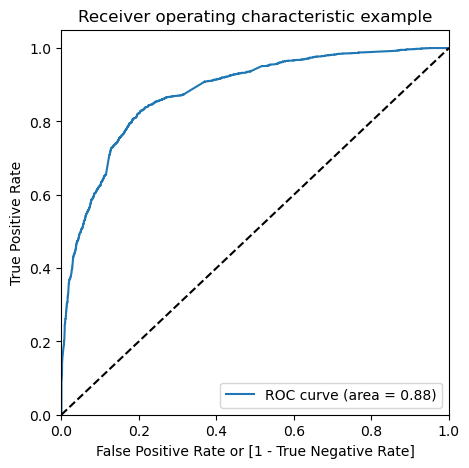

In [92]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.85 which is quite good. So we seem to have a good model.

In [93]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.264810,3009,0,1,1,1,0,0,0,0,0,0,0
1,0,0.434261,1012,0,1,1,1,1,1,0,0,0,0,0
2,0,0.150745,9226,0,1,1,0,0,0,0,0,0,0,0
3,1,0.904354,4750,1,1,1,1,1,1,1,1,1,1,1
4,1,0.685434,7987,1,1,1,1,1,1,1,1,0,0,0


In [94]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.578964  0.977514  0.329321
0.2   0.2  0.737522  0.907604  0.630986
0.3   0.3  0.801921  0.839738  0.778233
0.4   0.4  0.812313  0.789861  0.826376
0.5   0.5  0.811683  0.711774  0.874264
0.6   0.6  0.793103  0.587490  0.921895
0.7   0.7  0.777830  0.505315  0.948528
0.8   0.8  0.753582  0.405151  0.971831
0.9   0.9  0.710912  0.267784  0.988476


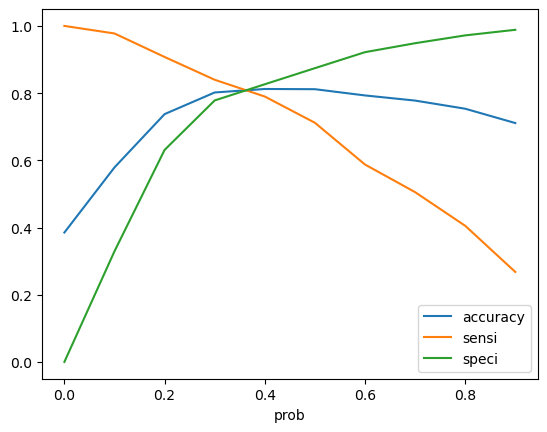

In [95]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above curve, 0.35 is the optimum cutoff point

In [96]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.264810,3009,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.434261,1012,0,1,1,1,1,1,0,0,0,0,0,1
2,0,0.150745,9226,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.904354,4750,1,1,1,1,1,1,1,1,1,1,1,1
4,1,0.685434,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [97]:
y_train_pred_final['Lead Score'] =y_train_pred_final.Conversion_Prob.map(lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.264810,3009,0,1,1,1,0,0,0,0,0,0,0,0,26
1,0,0.434261,1012,0,1,1,1,1,1,0,0,0,0,0,1,43
2,0,0.150745,9226,0,1,1,0,0,0,0,0,0,0,0,0,15
3,1,0.904354,4750,1,1,1,1,1,1,1,1,1,1,1,1,90
4,1,0.685434,7987,1,1,1,1,1,1,1,1,0,0,0,1,69


In [98]:
# Checking the accuracy again

print('Accuracy: ',metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy:  0.809951188789167


In [99]:
# Creating the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
print(confusion2)

[[3139  766]
 [ 441 2005]]


In [100]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

TPR = TP/(TP + FN) # true positive rate
TNR = TN/(TN + FP) # true negative rate
FPR = FP/(TN + FP) # false positive rate
FNR = FN/(TP + FN) # false negative rate

print ("True Negatives: ", TN)
print ("False Positves: ", FP)
print ("False Negatives: ", FN)
print ("True Positives: ", TP)

print("              ")

PPV = TP /(TP + FP) # positive predictive value
NPV = TN /(TN + FN) # negative predictive value

print ("Positive Predictive Value: ", PPV)
print ("Negative Predictive Value: ", NPV)

True Negatives:  3139
False Positves:  766
False Negatives:  441
True Positives:  2005
              
Positive Predictive Value:  0.7235654998195598
Negative Predictive Value:  0.8768156424581005


In [101]:
# Calculate Sensitivity

sen = TP/float(TP+FN)
print("Sensitivity:", sen)

Sensitivity: 0.8197056418642682


In [102]:
# Calculate Specificity

spec = TN/float(TN+FP)
print("Specificity:", spec)

Specificity: 0.8038412291933419


## Step 5: Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [103]:
X_test.columns

Index(['total_visits', 'time_on_website', 'page_views_per_visit',
       'lead_origin_Landing Page Submission', 'lead_origin_Lead Add Form',
       'lead_origin_Lead Import', 'lead_source_Direct Traffic',
       'lead_source_Facebook', 'lead_source_Google', 'lead_source_Live Chat',
       'lead_source_NC_EDM', 'lead_source_Olark Chat',
       'lead_source_Organic Search', 'lead_source_Pay per Click Ads',
       'lead_source_Press_Release', 'lead_source_Reference',
       'lead_source_Referral Sites', 'lead_source_Social Media',
       'lead_source_WeLearn', 'lead_source_Welingak Website',
       'lead_source_bing', 'lead_source_blog', 'lead_source_google',
       'lead_source_testone', 'lead_source_welearnblog_Home',
       'lead_source_youtubechannel', 'do_not_email_Yes',
       'last_activity_Converted to Lead', 'last_activity_Email Bounced',
       'last_activity_Email Link Clicked', 'last_activity_Email Marked Spam',
       'last_activity_Email Opened', 'last_activity_Email Receive

In [104]:
# Scale the test set as well using just 'transform'

X_test[['total_visits', 'time_on_website','page_views_per_visit']] = scaler.transform(X_test[['total_visits', 
                                                                    'time_on_website','page_views_per_visit']])

In [105]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,time_on_website,page_views_per_visit,lead_origin_Lead Add Form,lead_source_Welingak Website,do_not_email_Yes,last_activity_Converted to Lead,last_activity_Email Bounced,last_activity_Olark Chat Conversation,occupation_Working Professional,last_notable_activity_Email Link Clicked,last_notable_activity_Email Opened,last_notable_activity_Modified,last_notable_activity_Olark Chat Conversation,last_notable_activity_Page Visited on Website
3271,0.070530,0.666667,0,0,0,0,0,0,0,0,1,0,0,0
1490,0.679695,0.833333,0,0,0,0,0,0,1,0,1,0,0,0
7936,0.033243,0.333333,0,0,0,0,0,0,0,0,1,0,0,0
4216,0.000000,0.000000,1,0,0,0,0,0,0,0,0,1,0,0
3830,0.073675,1.000000,0,0,0,0,0,0,0,0,1,0,0,0


In [106]:
# Adding a constant to X_test

X_test_sm = sm.add_constant(X_test)

In [107]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)

In [108]:
y_test_pred[:10]

3271    0.134386
1490    0.962188
7936    0.163640
4216    0.796835
3830    0.096420
1800    0.712929
6507    0.422834
4821    0.381630
4223    0.957821
4714    0.150745
dtype: float64

In [109]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [110]:
# Let's see the head

y_pred_1.head()

,0
3271,0.134386
1490,0.962188
7936,0.163640
4216,0.796835
3830,0.096420


In [111]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [112]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [113]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [114]:
# Check 'y_pred_final'

y_pred_final.head()

,converted,0
0,0,0.134386
1,1,0.962188
2,0,0.163640
3,1,0.796835
4,0,0.096420


In [115]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [116]:
# Let's see the head of y_pred_final

y_pred_final.head()

,converted,Conversion_Prob
0,0,0.134386
1,1,0.962188
2,0,0.163640
3,1,0.796835
4,0,0.096420


In [117]:
# Make predictions on the test set using 0.35 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [118]:
# Check y_pred_final

y_pred_final.head()

,converted,Conversion_Prob,final_predicted
0,0,0.134386,0
1,1,0.962188,1
2,0,0.163640,0
3,1,0.796835,1
4,0,0.096420,0


In [119]:
# Let's check the overall accuracy.

print("Accuracy :",metrics.accuracy_score(y_pred_final.converted, y_pred_final.final_predicted))

Accuracy : 0.8016893132574366


In [120]:
# Making the confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final['converted'], y_pred_final.final_predicted )
confusion2

array([[1395,  339],
       [ 201,  788]], dtype=int64)

In [121]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [122]:
# Let's see the sensitivity of our logistic regression model

print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.7967644084934277


In [123]:
# Let us calculate specificity

print("Specificity :",TN / float(TN+FP))

Specificity : 0.8044982698961938


In [124]:
# Assigning Lead Score to the Testing data

y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_pred_final.head()

,converted,Conversion_Prob,final_predicted,Lead_Score
0,0,0.134386,0,13
1,1,0.962188,1,96
2,0,0.163640,0,16
3,1,0.796835,1,80
4,0,0.096420,0,10


## Precision-Recall View



In [125]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3414,  491],
       [ 705, 1741]], dtype=int64)

##### Precision


In [126]:
print("Precision : ",confusion[1,1]/(confusion[0,1]+confusion[1,1]))

Precision :  0.7800179211469535


##### Recall


In [127]:
print("Recall : ",confusion[1,1]/(confusion[1,0]+confusion[1,1]))

Recall :  0.7117743254292723


### Precision and recall tradeoff

In [128]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [129]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    1
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [130]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

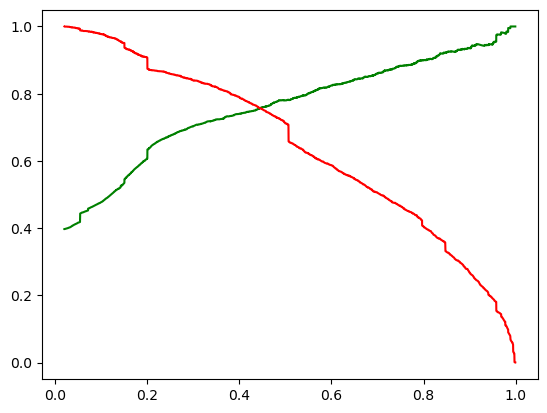

In [131]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.45 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead Score
0,0,0.264810,3009,0,1,1,1,0,0,0,0,0,0,0,0,26
1,0,0.434261,1012,0,1,1,1,1,1,0,0,0,0,0,0,43
2,0,0.150745,9226,0,1,1,0,0,0,0,0,0,0,0,0,15
3,1,0.904354,4750,1,1,1,1,1,1,1,1,1,1,1,1,90
4,1,0.685434,7987,1,1,1,1,1,1,1,1,0,0,0,1,69


In [133]:
# Let's check the accuracy now

print("Accuracy: ",metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Accuracy:  0.8132577546843017


In [134]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3322,  583],
       [ 603, 1843]], dtype=int64)

In [135]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Calculate Precision

TP/(TP+FP)

print('Precision :' , precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Precision : 0.7596867271228359


In [137]:
# Calculate Recall

TP/(TP+FN)

print('Recall :' , recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted))

Recall : 0.7534750613246116


## Observations

After running the model on the Test Data , we obtain:

- Accuracy : 80.4 %
- Sensitivity : 80.4 %
- Specificity : 80.4 %

# Results:

1) Comparing the values obtained for Train & Test:

####  Train Data:
 - Accuracy : 80.9 %
 - Sensitivity : 81.9 %
 - Specificity : 80.3 %
 
#### Test Data:
 - Accuracy : 80.1 %
 - Sensitivity : 79.6 %
 - Specificity : 80.4 %
 
Thus we have achieved our goal of getting a ballpark of the target lead conversion rate to be around 80% . The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model to get a higher lead conversion rate of 80%.

#### 2) Finding out the leads which should be contacted:

The customers which should be contacted are the customers whose "Lead Score" is equal to or greater than 85. They can be termed as 'Hot Leads'.


In [138]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

,converted,Conversion_Prob,final_predicted,Lead_Score
1,1,0.962188,1,96
8,1,0.957821,1,96
21,1,0.994404,1,99
23,1,0.997140,1,100
25,1,0.997140,1,100
...,...,...,...,...
2686,1,0.997140,1,100
2694,1,0.953192,1,95
2699,1,0.916798,1,92
2703,1,0.925592,1,93


#### So there are 360 leads which can be contacted and have a high chance of getting converted.

#### 3) Finding out the Important Features from our final model:

In [139]:
res.params.sort_values(ascending=False)

time_on_website                                  4.205813
lead_origin_Lead Add Form                        3.095399
occupation_Working Professional                  2.731340
lead_source_Welingak Website                     2.057436
const                                            0.027342
last_activity_Olark Chat Conversation           -1.126817
page_views_per_visit                            -1.164452
last_activity_Email Bounced                     -1.388993
last_notable_activity_Email Opened              -1.410399
last_activity_Converted to Lead                 -1.441080
last_notable_activity_Olark Chat Conversation   -1.459919
do_not_email_Yes                                -1.605013
last_notable_activity_Modified                  -1.756111
last_notable_activity_Page Visited on Website   -1.789816
last_notable_activity_Email Link Clicked        -1.821571
dtype: float64

### Recommendations:
- The company should make calls to the leads coming from the lead sources "Time on Website" and "Lead Origin Lead Add Form" as these are more likely to get converted.
- The company should make calls to the leads who are the "working professionals" as it is most likely to get converted.
- The company should make calls to the leads "Welingak Website" as it is most likely to get converted.
- The company should not make calls to the leads whose last activity was "Olark Chat Conversation" as they are not likely to get converted.
- The company should not make calls to the leads whose Specialization was "Others" as they are not likely to get converted.
- The company should not make calls to the leads who chose the option of "Do not Email" as "yes" as they are not likely to get converted.